In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# 6.1.4
# Create a set of random latitude and longitude combinations.
# generating 1500 lat/lngs using np.random between -90 and 90
# pairing them together with the zip() function
# zip() packs each pair of lats/lngs having the same index in their respecive arrays as a tuple
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# 6.1.5
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [5]:
#6.2.6 get the weather data
#enumerate, try and except loops
import requests
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
#enumerate is the same as a for loop, with slightly different syntax (for i, item in enumerate(list):)
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    # this is checking if the remainder of the index (i) devided by 50 is equal to 0, this will take 1-50 into one group, then 51-100 and so on
    # and if the index is greater than or equal to 50
    # if the statemnt is true, then the set_count and the record_count are incremented by 1
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    # creating the url endpoint for each city, but removing the spaces in the cities name
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ostrovnoy
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | srednekolymsk
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | yomitan
City not found. Skipping...
Processing Record 8 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 1 | poum
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | kongolo
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | vanimo
Processing Record 14 of Set 1 | veraval
Processing Record 15 of Set 1 | vila velha
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | dalby
Processing Record 18 of Set 1 | san policarpo
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | le vauclin
Processing Record 21 of Set

Processing Record 37 of Set 4 | san quintin
Processing Record 38 of Set 4 | kasongo-lunda
Processing Record 39 of Set 4 | manga
Processing Record 40 of Set 4 | kushikino
Processing Record 41 of Set 4 | torbay
Processing Record 42 of Set 4 | beloha
Processing Record 43 of Set 4 | saint-joseph
Processing Record 44 of Set 4 | rungata
City not found. Skipping...
Processing Record 45 of Set 4 | avarua
Processing Record 46 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 47 of Set 4 | edgewater
Processing Record 48 of Set 4 | clyde river
Processing Record 49 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 50 of Set 4 | pacifica
Processing Record 1 of Set 5 | nabire
Processing Record 2 of Set 5 | mount gambier
Processing Record 3 of Set 5 | katsuura
Processing Record 4 of Set 5 | russell
Processing Record 5 of Set 5 | san patricio
Processing Record 6 of Set 5 | montagnana
Processing Record 7 of Set 5 | sur
Processing Record 8 of Set 5 | cairns
Processing 

Processing Record 22 of Set 8 | imbituba
Processing Record 23 of Set 8 | alenquer
Processing Record 24 of Set 8 | crawfordsville
Processing Record 25 of Set 8 | fort nelson
Processing Record 26 of Set 8 | champerico
Processing Record 27 of Set 8 | tromso
Processing Record 28 of Set 8 | mogadishu
Processing Record 29 of Set 8 | kokoda
Processing Record 30 of Set 8 | senmonorom
City not found. Skipping...
Processing Record 31 of Set 8 | lagoa
Processing Record 32 of Set 8 | mahur
Processing Record 33 of Set 8 | ambulu
Processing Record 34 of Set 8 | sangin
Processing Record 35 of Set 8 | skibbereen
Processing Record 36 of Set 8 | grand-santi
Processing Record 37 of Set 8 | coquimbo
Processing Record 38 of Set 8 | pontes e lacerda
Processing Record 39 of Set 8 | dawlatabad
Processing Record 40 of Set 8 | cape canaveral
Processing Record 41 of Set 8 | blairmore
Processing Record 42 of Set 8 | manjakandriana
Processing Record 43 of Set 8 | tilichiki
Processing Record 44 of Set 8 | mount ver

Processing Record 10 of Set 12 | guatire
Processing Record 11 of Set 12 | kotido
Processing Record 12 of Set 12 | rujewa
Processing Record 13 of Set 12 | porto walter
Processing Record 14 of Set 12 | dzhebariki-khaya
Processing Record 15 of Set 12 | grindavik
Processing Record 16 of Set 12 | deer lake
Processing Record 17 of Set 12 | shahrud
Processing Record 18 of Set 12 | saint peter
Processing Record 19 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 20 of Set 12 | boguchany
Processing Record 21 of Set 12 | grimshaw
Processing Record 22 of Set 12 | wana
Processing Record 23 of Set 12 | qaqortoq
Processing Record 24 of Set 12 | karratha
Processing Record 25 of Set 12 | broken hill
Processing Record 26 of Set 12 | lethem
Processing Record 27 of Set 12 | skjervoy
Processing Record 28 of Set 12 | sembakung
Processing Record 29 of Set 12 | alyangula
Processing Record 30 of Set 12 | kashi
Processing Record 31 of Set 12 | chapayevka
Processing Record 32 of Set 12 | sayan


In [9]:
len(city_data)

559

In [10]:
# 6.2.7
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ostrovnoy,68.0531,39.5131,31.64,73,88,19.60,RU,2021-10-20 02:29:13
1,Bluff,-46.6000,168.3333,51.12,56,29,4.83,NZ,2021-10-20 02:31:56
2,Srednekolymsk,67.4500,153.6833,3.40,86,17,4.29,RU,2021-10-20 02:31:56
3,Vaini,-21.2000,-175.2000,78.96,50,40,10.36,TO,2021-10-20 02:31:56
4,Jamestown,42.0970,-79.2353,58.71,78,1,5.99,US,2021-10-20 02:28:26
5,Puerto Ayora,-0.7393,-90.3518,70.02,88,75,7.65,EC,2021-10-20 02:27:47
6,Poum,-20.2333,164.0167,75.83,80,100,9.33,NC,2021-10-20 02:31:57
7,Hithadhoo,-0.6000,73.0833,83.07,73,95,11.86,MV,2021-10-20 02:31:58
8,Kongolo,-5.3833,27.0000,69.17,98,100,1.23,CD,2021-10-20 02:31:58
9,Ribeira Grande,38.5167,-28.7000,69.37,68,32,8.70,PT,2021-10-20 02:31:58


In [14]:
# reset the column order
new_column_order= ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ostrovnoy,RU,2021-10-20 02:29:13,68.0531,39.5131,31.64,73,88,19.60
1,Bluff,NZ,2021-10-20 02:31:56,-46.6000,168.3333,51.12,56,29,4.83
2,Srednekolymsk,RU,2021-10-20 02:31:56,67.4500,153.6833,3.40,86,17,4.29
3,Vaini,TO,2021-10-20 02:31:56,-21.2000,-175.2000,78.96,50,40,10.36
4,Jamestown,US,2021-10-20 02:28:26,42.0970,-79.2353,58.71,78,1,5.99
5,Puerto Ayora,EC,2021-10-20 02:27:47,-0.7393,-90.3518,70.02,88,75,7.65
6,Poum,NC,2021-10-20 02:31:57,-20.2333,164.0167,75.83,80,100,9.33
7,Hithadhoo,MV,2021-10-20 02:31:58,-0.6000,73.0833,83.07,73,95,11.86
8,Kongolo,CD,2021-10-20 02:31:58,-5.3833,27.0000,69.17,98,100,1.23
9,Ribeira Grande,PT,2021-10-20 02:31:58,38.5167,-28.7000,69.37,68,32,8.70


In [17]:
#create the output file (CSV), to the file weather_data
output_data_file = "weather_data/cities.csv"
#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
#6.3.1
#extract relevent fields from the dataframe for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

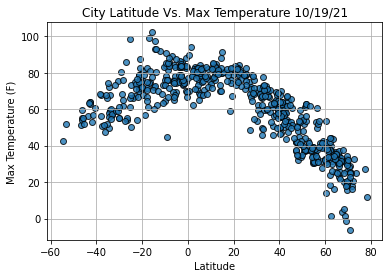

In [20]:
#import time module
import time

#build the scatter plot for the latitude vs. max temp
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidth=1, marker="o",
            alpha=.8, label="Cities")

#incorperate the other graph properties
plt.title(f"City Latitude Vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/fig1.png")

#show plot
plt.show()

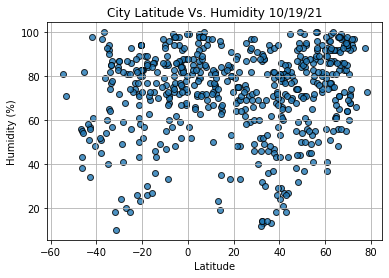

In [21]:
#6.3.2
#build the scatter plot for the latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidth=1, marker="o",
            alpha=.8, label="Cities")

#incorperate the other graph properties
plt.title(f"City Latitude Vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/fig2.png")

#show plot
plt.show()

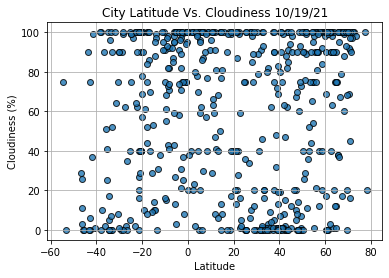

In [22]:
#6.3.3
#build the scatter plot for the latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidth=1, marker="o",
            alpha=.8, label="Cities")
plt.title(f"City Latitude Vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/fig3.png")
plt.show()

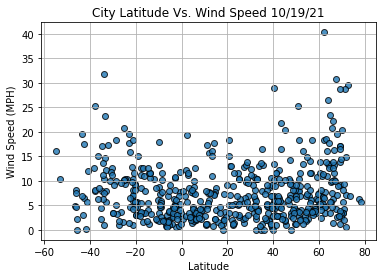

In [23]:
#6.3.4
#build the scatter plot for the latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidth=1, marker="o",
            alpha=.8, label="Cities")
plt.title(f"City Latitude Vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weather_data/fig4.png")
plt.show()

In [ ]:
#6.4.2
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()